<a href="https://colab.research.google.com/github/shikhacov/NLPCW1/blob/main/NLP_CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [44]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
data=pd.read_table(r"/content/semeval2016-task6-trainingdata[1].txt",encoding='latin-1')
data1=pd.DataFrame(data)


In [46]:
data1

,ID,Target,Tweet,Stance
0,101,Atheism,dear lord thank u for all of ur blessings forg...,AGAINST
1,102,Atheism,"Blessed are the peacemakers, for they shall be...",AGAINST
2,103,Atheism,I am not conformed to this world. I am transfo...,AGAINST
3,104,Atheism,Salah should be prayed with #focus and #unders...,AGAINST
4,105,Atheism,And stay in your houses and do not display you...,AGAINST
...,...,...,...,...
2809,2910,Legalization of Abortion,"There's a law protecting unborn eagles, but no...",AGAINST
2810,2911,Legalization of Abortion,I am 1 in 3... I have had an abortion #Abortio...,AGAINST
2811,2912,Legalization of Abortion,How dare you say my sexual preference is a cho...,AGAINST
2812,2913,Legalization of Abortion,"Equal rights for those 'born that way', no rig...",AGAINST


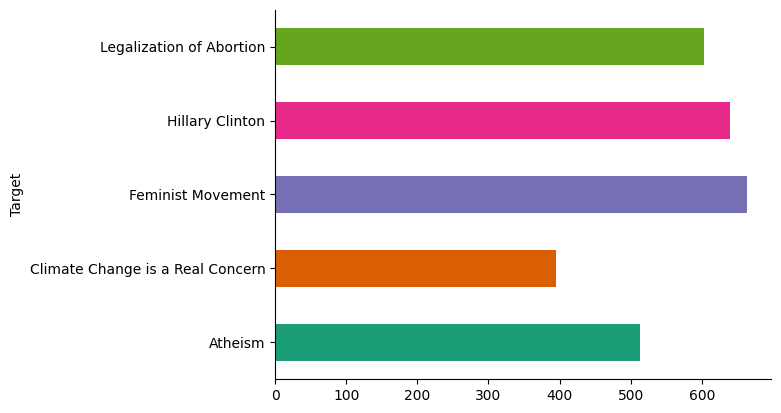

In [47]:
# @title Target

from matplotlib import pyplot as plt
import seaborn as sns
data1.groupby('Target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [49]:
#Encoding target column
target_encoder = LabelEncoder()
data['Target'] = target_encoder.fit_transform(data['Target'])

In [50]:
#Encoding Stance
stance_encoder = LabelEncoder()
data['Stance'] = stance_encoder.fit_transform(data['Stance'])

In [51]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Target', 'Tweet']], data['Stance'], test_size=0.2, random_state=42)


In [52]:
# Vectorize the text data
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train['Tweet'])
X_test_tfidf = tfidf.transform(X_test['Tweet'])

In [53]:
# Combine the target and text features
import scipy
X_train_combined = scipy.sparse.hstack([X_train['Target'].values[:, None], X_train_tfidf])
X_test_combined = scipy.sparse.hstack([X_test['Target'].values[:, None], X_test_tfidf])


In [54]:
# Train and evaluate SVM classifier
svm = SVC()
svm.fit(X_train_combined, y_train)
y_pred_svm = svm.predict(X_test_combined)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')
print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'SVM F1 Score: {svm_f1:.2f}')

SVM Accuracy: 0.55
SVM F1 Score: 0.44


In [55]:
# Train and evaluate Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train_combined, y_train)
y_pred_rf = rf.predict(X_test_combined)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(f'Random Forest F1 Score: {rf_f1:.2f}')

Random Forest Accuracy: 0.59
Random Forest F1 Score: 0.57


In [56]:
# Train and evaluate Decision Tree classifier (DEFAULT PARAMETERS)
dt = DecisionTreeClassifier()
dt.fit(X_train_combined, y_train)
y_pred_dt = dt.predict(X_test_combined)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')
print(f'Decision Tree F1 Score: {dt_f1:.2f}')

Decision Tree Accuracy: 0.58
Decision Tree F1 Score: 0.57


In [19]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters for each model
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
rf_param_grid = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10]}
dt_param_grid = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}

# Perform grid search for each model
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid_search.fit(X_train_combined, y_train)
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train_combined, y_train)
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
dt_grid_search.fit(X_train_combined, y_train)

# Get the best parameters for each model
svm_best_params = svm_grid_search.best_params_
rf_best_params = rf_grid_search.best_params_
dt_best_params = dt_grid_search.best_params_

# Create a DataFrame to display the best parameters
best_params_df = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'Decision Tree'],
    'Best Parameters': [svm_best_params, rf_best_params, dt_best_params]
})

print(best_params_df)


           Model                              Best Parameters
0            SVM                   {'C': 10, 'kernel': 'rbf'}
1  Random Forest     {'max_depth': None, 'n_estimators': 100}
2  Decision Tree  {'criterion': 'gini', 'splitter': 'random'}


In [22]:
# Train and evaluate SVM classifier
svm = SVC(C= 10, kernel='rbf')
svm.fit(X_train_combined, y_train)
y_pred_svm = svm.predict(X_test_combined)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')
print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'SVM F1 Score: {svm_f1:.2f}')

SVM Accuracy: 0.63
SVM F1 Score: 0.62


In [23]:
# Train and evaluate Random Forest classifier
rf = RandomForestClassifier(max_depth=None,n_estimators=100)
rf.fit(X_train_combined, y_train)
y_pred_rf = rf.predict(X_test_combined)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(f'Random Forest F1 Score: {rf_f1:.2f}')

Random Forest Accuracy: 0.61
Random Forest F1 Score: 0.59


In [24]:
# Train and evaluate Decision Tree classifier
dt = DecisionTreeClassifier(criterion='gini',splitter='random')
dt.fit(X_train_combined, y_train)
y_pred_dt = dt.predict(X_test_combined)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')
print(f'Decision Tree F1 Score: {dt_f1:.2f}')

Decision Tree Accuracy: 0.59
Decision Tree F1 Score: 0.58


In [42]:
import numpy as np
def identify_stance_and_target(text):
  """
  This function takes a text input and identifies the stance and target using the trained models.

  Args:
    text: The input text for which the stance and target need to be identified.

  Returns:
    A dictionary containing the identified stance and target.
  """

  # Vectorize the input text
  text_tfidf = tfidf.transform([text])

  # Combine the target and text features
  text_combined = scipy.sparse.hstack([np.array([0]), text_tfidf])

  # Predict the stance and target
  stance_prediction = rf.predict(text_combined)[0]
  target_prediction = dt.predict(text_combined)[0]

  # Get the corresponding stance and target labels
  stance_label = stance_encoder.inverse_transform([stance_prediction])[0]
  target_label = target_encoder.inverse_transform([target_prediction])[0]

  # Return the results as a dictionary
  return {
      "stance": stance_label,
      "target": target_label
  }

# Example usage
input_text = input("Enter a text: ")

result = identify_stance_and_target(input_text)

print(f"Stance: {result['stance']}")
print(f"Target: {result['target']}")



Enter a text: Pregnancy is not a crisis. It's a gift. Whether they be wanted by you or someone else, no child is unwanted.
Stance: AGAINST
Target: Feminist Movement
